

<CENTER>
<div style=width:500px;border-radius:10px;height:220px;background-color:#ffcccc;text-align:center;vertical-align:middle;>
   
<font size=14, font color=navy>   
<font size=14, font color=navy>Tris par comparaison

</div>
</CENTER>

# TRIS PAR COMPARAISON

* Collection d'objets (à trier)   
$\rightarrow$ structure de Liste
* Comparaison possible    
$\rightarrow$ Liste homogène (même type)    
$\rightarrow$ $\verb"int"$ ou $\verb"float"$ (souvent)    
$\rightarrow$ Relation d'ordre totale $\preccurlyeq$

### Relation d'ordre totale (rappel/complément)

#### Relation d'ordre
* <b>[R] Réflexivité :</b> $\forall x \in E$, $x\preccurlyeq x$
* <b>[A] Antisymétrie :</b> $\forall (x,y) \in E^2$, $x\preccurlyeq y$ et $y\preccurlyeq x$ $\Rightarrow$ $x=y$
* <b>[T] Transitivité :</b> $\forall (x,y,z) \in E^3$, $x\preccurlyeq y$ et $y\preccurlyeq z$ $\Rightarrow$ $x\preccurlyeq z$    
Peut être vue comme :
    * Sous-partie de $E\times E$ des paires en relation
    * Applications de $E\times E$ vers $B=\{{\rm VRAI},{\rm FAUX}\}$
* <b> [T'] Totalité :</b> $\forall (x,y)\in E^2$, $x\preccurlyeq y$ ou $y\preccurlyeq x$

#### Relation d'ordre totale
* <b> [T'] Totalité :</b> $\forall (x,y)\in E^2$, $x\preccurlyeq y$ ou $y\preccurlyeq x$

#### Exemples d'ordres totaux
* Ordre naturel $\leqslant$ sur $\mathbb N$, $\mathbb Z$, $\mathbb R$ (inférieur ou égal)
* Ordre lexicographique $\preccurlyeq_{\text{lexi}}$ sur les mots (de $A^\ast$) d'un alphabet $A$    
$\rightarrow$ ex : $123 \preccurlyeq_{\text{lexi}} 1234$, $1234\preccurlyeq_{\text{lexi}} 2$

#### Contre-exemples
* Inclusion sur $\mathcal{P}(E)$ : partiel
* Parallélisme sur les droites du plan : partiel
* Cas de $\mathbb C$ :
    * Totalement ordonné par l'ordre lexicographique
    * N'existe pas d'ordre total prolongeant celui de $\scriptstyle ({\mathbb R},+,\cdot)$.

### Hypothèses

* Listes numériques homogènes $[a_0,... , a_{n-1}]$
* Ordre $\leqslant$ ($\verb"<="$ en Python)
* Eléments entiers ($\verb"int"$)    
$\rightarrow$ éviter les tests sur les flottants (erreurs d'arrondis)
* Seules opérations licites (coût 1):
    * Comparaison $a_i\leq a_j$
    * Permutation $a_i\leftrightarrow a_j$

### Résultat

* Liste triée dans l'ordre croissant (de gauche à droite)
* Variantes :
    * retourne une <i>nouvelle</i> liste triée
    * tri <i>en place</i>

### Méthodes

* Itératif vs Récursif
* Tri stable (conserve l'ordre initial des éléments égaux) ?
* Tri interne ou externe

### Motivation

* Recherche dichotomique dans une liste triée en $O(\ln n)$.
* Recherche efficace de médiane
* Gestion de fichiers (date, nom, ...)

### Complexité

* Taille de l'instance $n=\verb"len(L)"$.
* Complexités :
    * Pire des cas
    * En moyenne

# TRI PAR SELECTION (selection sort)

* Tri en place par parcours de liste
* <b>Principe :</b>
    * On cherche le plus petit élément de la liste.
    * On l'échange avec le premier.
    * On applique ce principe au sous-tableau droit.
* <b>Plus précisément :</b> 
    * on insére à chaque itération :
        * le minimum de la sous-liste droite 
        * en fin de sous liste gauche

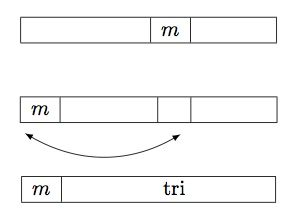

In [3]:
from IPython.display import Image,display
i = Image(filename='figtriselection.jpg')
display(i)

Voici les grandes étapes d'un tri par sélection.
* <b>éléments ayant trouvé leur place définitive</b>
* <i>éléments qui ont été échangés</i>

$
\begin{array}{|c|c|c|c|}
\hline
3&1&7&2\\
\hline
\end{array}$

$\rightarrow \begin{array}{|c|c|c|c|}
\hline
\mathbf{1}&\mathit{ 3}&7&2\\
\hline
\end{array}$

$\rightarrow \begin{array}{|c|c|c|c|}
\hline
\mathbf{1}&\mathbf{2}&7&\mathit{ 3}\\
\hline
\end{array}$

$
\rightarrow \begin{array}{|c|c|c|c|}
\hline
\mathbf{1}&\mathbf{2}&\mathbf{3}&\mathbf{7}\\
\hline
\end{array}
$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random
import sys

In [2]:
def initie(n,r):  #fait ce qu'il faut 
    global fig, ax, scat
    lx=range(n)
    lval = [random.randrange(1,r) for i in range(n)]      
    fig, ax=plt.subplots(1,1)
    scat=ax.scatter(lx,lval)
    return [(i,j) for i in range(n) for j in range(n-i-1)]

def minimum(L,i):
    mini=L[i]
    indice=i
    n=len(L)
    for j in range(i,n):
        if L[j]<mini:
            mini=L[j]
            indice=j
    return indice

def change(i,fig,scat):
    u=i#fait aussi ce qu'il faut
    LL=scat.get_offsets()
    Ltest=[LL[k][1] for k in range(len(LL))]
    j=minimum(Ltest,u)
    LL[j][1],LL[u][1]=LL[u][1],LL[j][1]
    scat.set_offsets(LL)

In [3]:
n=100
r=1000
plt.close()
lframes=initie(n,r)#Ca buggait avec cette liste-là de frames. 
ani=anim.FuncAnimation(fig,change,fargs=(fig,scat),frames=range(n),interval=200)

In [4]:
from IPython.display import HTML
HTML(ani.to_html5_video())

#### Version itérative

In [14]:
def tri_selection(L):
    n=len(L)
    for i in range(n-1):
        indice=i#désigne l'indice du minimum de la sous liste non triée
        for j in range(i+1,n):
            if L[j]<L[indice]:
                indice=j
        if indice!=i:
            L[i],L[indice]=L[indice],L[i]

* Inutile de modifier les éléments de $\verb"L"$ dans la boucle interne    
$\rightarrow$ il suffit de mémoriser l'indice du minimum <i>droit</i>    
$\rightarrow$ on fait l'échange avec le <i>pivot</i> en fin de boucle

In [15]:
#Test
L=[1,8,3,8,2,9,76,0,5,8,7]
tri_selection(L)
L
import numpy.random as rd
import numpy as np
rd.randint(0,11)
def liste_alea(n,max):
    return [rd.randint(0,max) for i in range(n)]
L=liste_alea(20,101)
M=[L[i] for i in range(20)]
tri_selection(L)
np.array(M),np.array(L)
#rd.randint(0,101,12)

(array([ 93,  29, 100,  96,  80,  80,  33,   9,   1,  53,  62,  23,   3,
         66,  96,  49,   8,  97,  56, 100]),
 array([  1,   3,   8,   9,  23,  29,  33,  49,  53,  56,  62,  66,  80,
         80,  93,  96,  96,  97, 100, 100]))

#### Version modulaire

In [21]:
def pos_minimum(L,j):
    """donne le minimum de la liste
    à partir de l'indice j>=0.
    Nécessaire pour trier en place"""
    pos=j
    for i in range(j+1,len(L)):
        if L[i]<L[pos]:
            pos=i
    return pos

In [22]:
def tri_selection_mod(L):
    n=len(L)
    for j in range(n-1):
        pos=minimum(L,j)
        if pos!=j:
            L[pos],L[j]=L[j],L[pos]

#### Version récursive

In [23]:
def tri_selectionrec(L):
    if len(L)<=1:
        return L
    else:
        mini=min(L)
        indice=L.index(mini)
        if indice!=0:
            L[0],L[indice]=L[indice],L[0]
        return [L[0]]+tri_selectionrec(L[1:])
def selection_rec(L,g):
    if len(L)>1:
        pos=g
        for i in range(g+1,len(L)):
            if L[i]<L[pos]:
                pos=i
        if pos!=g:
            L[pos],L[g]=L[g],L[pos]
        return selection_rec(L,g+1)
def tri_sel_rec(L):
    return tri_sel_rec(L,0)
    

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random
import sys

In [5]:
def initie(n,r):  #fait ce qu'il faut 
    global fig, ax, scat
    lx=range(n)
    lval = [random.randrange(1,r) for i in range(n)]      
    fig, ax=plt.subplots(1,1)
    scat=ax.scatter(lx,lval)
    return [(i,j) for i in range(n) for j in range(n-i-1)]

def minimum(L,i):
    mini=L[i]
    indice=i
    n=len(L)
    for j in range(i,n):
        if L[j]<mini:
            mini=L[j]
            indice=j
    return indice

def change(i,fig,scat):
    u=i#fait aussi ce qu'il faut
    LL=scat.get_offsets()
    Ltest=[LL[k][1] for k in range(len(LL))]
    j=minimum(Ltest,u)
    LL[j][1],LL[u][1]=LL[u][1],LL[j][1]
    scat.set_offsets(LL)
    
    

In [6]:
n=100
r=1000
plt.close()
lframes=initie(n,r)#Ca buggait avec cette liste-là de frames. 
ani=anim.FuncAnimation(fig,change,fargs=(fig,scat),frames=range(n),interval=200)

In [7]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [9]:
#Alternative :
from matplotlib import rc
rc('animation', html='html5')
#les idees viennent de 
#http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

### Stabilité

Sauf à prendre des précautions supplémentaires (recherche de la  première ocurrence d'un élément), ce tri n'est pas stable

### Terminaison
Sans problème : 2 boucles $\verb"for"$ imbriquées

### Correction
* Invariant de boucle : $\verb"L[0,p]"$ définitivement triée à l'issue de la $p^{\text{ième}}$ itération :
    * Après la première itération $\verb"L[0,1]"$ ne contient qu'un élément et est triée.
    * Supposons qu'après la $p^{\text{ième}}$ itération, $\verb"L[0,p]"$ est triée.    
    Nécessairement, les éléments de $\verb"L[p:]"$ sont tous supérieurs à $\verb"L[p-1]"$.    
    La boucle interne effectue une recherche du minimum de $\verb"L[p:]"$.    
    En sortie de boucle, ce minimum est placé dans $\verb"L[p]"$.

Ainsi :
   * $\forall i \in [\! | 0,p-1|\! ]$, $\verb"L[i]<=L[p]"$ et par hypothèse, la liste $\verb"L[0,p+1]"$ est triée.
   * $\forall i \in [\! | p+1,n-1|\! ]$, $\verb"L[p]<=L[i]"$ : aucun élément de $\verb"L[p+1:]"$ n'a sa place dans $\verb"L[0,p+1]"$ : cette sous liste est définitivement triée.
   
D'où la correction par récurrence finie, vu qu'en sortie, il ne reste plus d'élément à placer

### Complexité
* $i^{\text{ème}}$ itération (boucle externe) :
    * $n-1-(i+1)+1=n-i-1$ itération de la boucle interne.    
    $\rightarrow$ 1 comparaison à chaque fois    
    $\rightarrow$ $n-i-1$ comparaisons au total 
    * 2 affectations en fin de boucle interne
* Total :
    * $\sum\limits_{i=0}^{n-2}n-1-i=\frac{n(n-1)}{2}$ comparaisons
    * $2(n-1)$ affectations (pire des cas)

#### Bilan :
* $C(n)=O(n^2)$    
$\rightarrow$ juste acceptable
* Pire des cas : $\verb"[2,3,...,n-1,n,1]"$    
$\rightarrow$ $2(n-1)$ affectations

# TRI INSERTION (insertion sort)

* Tri en place par parcours de liste (g$\rightarrow$d)
* <b>Principe (d'insertion):</b>
    * Avant la $k^{\text{ième}}$ étape, $\verb"L[0,k-1]"$ est supposée triée
    * On insère le $k^{\text{ième}}$ élément $x$ de $\verb"L"$ à gauche :
        * Tant que l'élément à gauche de $x$ lui est supérieur    
        $\rightarrow$ On échange les deux
* Variante : 
    * On mémorise $x$
    * On se contente de décaler les éléments du tableau gauche supérieurs à $x$.
    * On insère $x$ à la place vide en fin de course

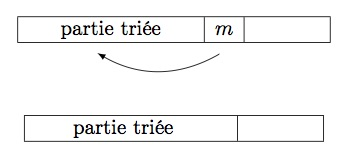

In [7]:
from IPython.display import Image,display
i = Image(filename='figtriinsertion.jpg')
display(i)

Voici l'insertion d'un élément (le quatrième) :

$\quad 
\begin{array}{|c|c|c|c|c|}
\hline
1&3&7&2&...\\
\hline
\end{array} $


$\rightarrow \begin{array}{|c|c|c|c|c|}
\hline
1&3&7&\color{white}{2}&...\\
\hline
\end{array} \quad x=2$

$\rightarrow \begin{array}{|c|c|c|c|c|}
\hline
1&3&\color{white}{2}&7&...\\
\hline
\end{array} \quad x<7$

$\rightarrow \begin{array}{|c|c|c|c|c|}
\hline
1&\color{white}{2}&3&7&...\\
\hline
\end{array}  \quad x<3$

$\rightarrow \begin{array}{|c|c|c|c|c|}
\hline
1&2&3&7&...\\
\hline
\end{array} \quad x\geq 1$

Voici les grandes étapes d'un tri par insertion :

   $\quad 
\begin{array}{|c|c|c|c|}
\hline
7&1&3&2\\
\hline
\end{array}
$

$\rightarrow \begin{array}{|c|c|c|c|}
\hline
1&7&3&2\\
\hline
\end{array}$

$\rightarrow \begin{array}{|c|c|c|c|}
\hline
1&3&7&2\\
\hline
\end{array}$

$\rightarrow \begin{array}{|c|c|c|c|}
\hline
1&2&3&7\\
\hline
\end{array}$

In [8]:
n=100
r=1000
lx=range(n)
lval = [random.randrange(1,r) for i in range(n)]

lxi=list(range(n))
lvali=[lval[k] for k in range(len(lval))]
def initie():  #fait ce qu'il faut 
    global fig, ax, scat , lxi, lvali    
    fig, ax=plt.subplots(1,1)
    scat=ax.scatter(lxi,lvali)



def change(u,fig,scat):
    i,j=lframes[u]#unpacking
    LL=scat.get_offsets()
    LL[j][1],LL[i][1]=LL[i][1],LL[j][1]
    scat.set_offsets(LL)


#Pour compter le nombre de frames, on lance une première fois le tri sur lx et lval
#On reprendra les mêmes pour l'affichage en conservant ue copie
#On ajoute la variable globale lframes qui fabrique la liste des indices (i,j)
lframes=[]
Lpart=[lval[k] for k in range(len(lval))]
for i in range(1,n):
    x=Lpart[i]
    j=i-1
    while (j>-1) and (Lpart[j]>x):
        Lpart[j+1]=Lpart[j]
        lframes.append((j+1,j))
        j=j-1
    Lpart[j+1]=x

In [9]:
plt.close()
initie() 
ani=anim.FuncAnimation(fig,change,fargs=(fig,scat),frames=range(len(lframes)),interval=10)

In [10]:
from IPython.display import HTML
HTML(ani.to_html5_video())

#### Version itérative

In [34]:
def tri_insertion(L):
    n=len(L)
    for i in range(1,n):
        x=L[i]
        j=i-1
        while (j>-1) and (L[j]>x):
            L[j+1]=L[j]
            j=j-1
        L[j+1]=x

* Pas de boucle interne $\verb"for"$    
$\rightarrow$ arrêt $\leftrightarrow$ position définitive de $x$    
$\rightarrow$ sinon : placement de $x$ partout à sa gauche
* Evaluation paresseuse de Python    
$\rightarrow$ si $\verb"j==-1"$, pas d'évaluation de $\verb"L[-1]"$    
$\rightarrow$ évite <i>list index out of range</i>

In [37]:
#Test
import numpy as np
import numpy.random as rd
def lalea(n,Max):
    return [rd.randint(0,Max) for i in range(n)]
Ltest=lalea(100,1000)
Ltestbis=[Ltest[i] for i in range(len(Ltest))]
tri_insertion(Ltest)
np.array(Ltestbis),np.array(Ltest)

(array([267, 190, 590, 668, 621, 195, 926, 751, 489, 768, 394, 360, 585,
        156, 564, 944, 543,  86, 988, 283, 614, 523, 199, 691, 417, 872,
        439, 291, 301, 747, 287,  24, 517, 616, 572, 574, 308, 960,  72,
         33, 999, 191,  22, 597, 325, 302, 279,   7, 376, 398, 746, 239,
        501, 966, 918, 928, 331, 824, 362, 278, 703,  36, 445, 437, 212,
        132, 167, 219, 875, 152, 163, 554, 920, 953, 200, 434, 234, 536,
        991, 265, 783, 105, 655, 525, 656, 934, 186,  35, 963, 593, 967,
        566,  75,  53, 341, 370, 785, 692, 352, 995]),
 array([  7,  22,  24,  33,  35,  36,  53,  72,  75,  86, 105, 132, 152,
        156, 163, 167, 186, 190, 191, 195, 199, 200, 212, 219, 234, 239,
        265, 267, 278, 279, 283, 287, 291, 301, 302, 308, 325, 331, 341,
        352, 360, 362, 370, 376, 394, 398, 417, 434, 437, 439, 445, 489,
        501, 517, 523, 525, 536, 543, 554, 564, 566, 572, 574, 585, 590,
        593, 597, 614, 616, 621, 655, 656, 668, 691, 692, 703, 746, 7

#### Version modulaire

In [ ]:
def tri_insertion2(L):
    n=len(L)
    for i in range(1,n):
        aplacer=L[i]
        insertion(aplacer,L,i)
    return L
    
def insertion(x,L,j):
    k=j
    while(k>0) and (x<L[k-1]):
        L[k]=L[k-1]
        k=k-1
    L[k]=x

#### Version récursive

In [29]:
def insertionrec(a,l):
    if not l:
        return [a]
    else:
        b=l[-1]
        if a>b:
            return l+[a]
        else:
            return insertionrec(a,l[:-1])+[b]
        
def tri_insertionrec(l):
    if l==[]:
        return []
    else:
        return insertionrec(l[-1],tri_insertionrec(l[:-1]))

### Terminaison

Fonction $\verb"tri_insertion"$

* Terminaison $\verb"for"$ externe certaine    
$\rightarrow$ si les instructions internes se terminent. 
* Terminaison boucles $\verb"while"$ : $\verb"j"$ $\leftrightarrow$ variant de boucle    
    $\rightarrow$ sortie sur le test $\verb"L[j]>x"$    
    $\rightarrow$ ou bien $\verb"j"$ atteint -1.

### Correction
* Invariant de boucle : $\verb"L[0,p]"$ triée à l'issue de la $p^{\text{ième}}$ itération
    * Après la première itération $\verb"L[0,1]"$ ne contient qu'un élément et est triée.
    * Supposons $\verb"L[0,p]"$ triée après la $p^{\text{ième}}$ itération
    Après la boucle $\verb"while"$ à la ${p+1}^{\text{ième}}$ itération :

* soit $j=-1$ et la sous liste initialement triée $\verb"L[0,p]"$ coïncide avec $\verb"L[1,p+1]"$ dans le même ordre et $\verb"x"$ (placé à l'indice 0) est inférieur à ses éléments : $\verb"L[0,p+1]"$ est triée.
* soit $j$ est le premier indice tel que $\verb"L[j]<=x"$.    
Tous les éléments de $\verb"L[0:j+1]"$ son triés et inférieurs à $\verb"x"$.    
Tous les éléments de $\verb"L[j+2:p+1]"$ sont ceux de $\verb"L[j+1:p]"$ dans le même ordre, donc triés.    
Comme $\verb"x"$ s'intercale entre ces deux listes, $\verb"L[0,p+1]"$ est triée.

### Complexité
* $i^{\text{ème}}$ itération (boucle externe) :
    * Pire des cas : boucle $\verb"while"$ $\leftrightarrow$ condition $\verb"j==-1"$    
    $\rightarrow$ $i$ itérations internes   
    $\rightarrow$ 1 comparaison + 1 affectation à chaque fois    
    $\rightarrow$ $i$ comparaisons + $(i+2)$ affectations au total 
* Total :
    * $\sum\limits_{i=1}^{n-1} i=\frac{n(n-1)}{2}$ comparaisons
    * $\sum\limits_{i=1}^{n-1} i+2=\frac{(n+4)(n-1)}{2}$ affectations


#### Bilan :
* $C(n)=O(n^2)$    
$\rightarrow$ juste acceptable
* Pire des cas : $\verb"[n,n-1,...,2,1]"$    
* Tri stable grâce à $\verb"L[j]>x"$ au lieu de $\verb"L[j]>=x"$


# TRI BULLE (bubble sort)

* Variation (rappelant les bulles de champagne) autour du tri par sélection
* Tri en place par parcours de liste
* <b>Principe :</b>
    * On <i>fait remonter</i> en fin de liste le plus grand élément de la liste par échanges successif
    * On applique successivement ce principe au tableau qu'on parcourt entièrement, sauf le dernier (les 2 derniers, les 3 derniers,...) élément(s) qui est(/sont) en place.

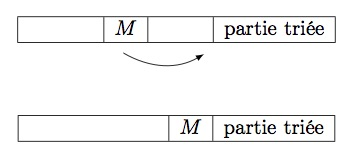

In [35]:
from IPython.display import Image,display
i = Image(filename='figtribulle.jpg')
display(i)

In [11]:
def initie(n,r):  #fait ce qu'il faut 
    global fig, ax, scat
    lx=range(n)
    lval = [random.randrange(1,r) for i in range(n)]      
    fig, ax=plt.subplots(1,1)
    scat=ax.scatter(lx,lval)
    return [(i,j) for i in range(n) for j in range(n-i-1)]



def change(u,fig,scat):   #fait aussi ce qu'il faut
    i,j=u#unpacking
    LL=scat.get_offsets()
    if LL[j][1]>LL[j+1][1]:
        LL[j][1],LL[j+1][1]=LL[j+1][1],LL[j][1]
    scat.set_offsets(LL)

In [12]:
n=100
r=1000
plt.close
lframes=initie(n,r)
ani=anim.FuncAnimation(fig,change,fargs=(fig,scat),frames=lframes,interval=10)

In [13]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [33]:
def tribulle(L):
    n=len(L)
    for i in range(n):
        for j in range(n-i-1):
            if L[j]>L[j+1]:
                L[j],L[j+1]=L[j+1],L[j]

#### Correction 
* Comme pour le tri par sélection

#### Terminaison
* Immédiate $\rightarrow$ boucles $\verb"for"$

#### Stabilité
* Garantie par le signe $\verb"<"$ strict

#### Complexité
* $C(n)=O(n^2)$ (2 boucles imbriquées)

# TRI RAPIDE (quicksort) 

* Tri récursif $\rightarrow$ "Diviser pour régner"
* <b>Principe :</b>
    * On choisit un élément $x$ (pivot) dans la liste à trier
    * On crée 2 listes ("diviser") :
        * Les éléments à trier inférieurs à $x$
        * Les éléments à trier supérieurs à $x$
    * On les trie récursivement (régner")
    * On intercale $x$ entre les deux ("combiner")

### Version récursive (par création de listes)

In [19]:
def quicksort(L):
    if len(L)<=1:
        return L+[]
    else:
        x,L1,L2=L[0],[],[]
        n=len(L)
        for i in range(1,n):
            if L[i]<=x:
                L1.append(L[i])
            else:
                L2.append(L[i])
        return quicksort(L1)+[x]+quicksort(L2)
import numpy.random as rd
import numpy as np
L=[rd.randint(0,101) for i in range(100)]
M=L+[]
np.array(L),np.array(quicksort(M)),np.array(M)

(array([17, 30, 91,  4, 99, 27,  5, 84, 56, 95, 80, 56, 76, 74,  2,  5, 20,
        91,  9, 11, 53, 97, 20, 49, 11, 28, 13, 90, 78, 94, 88, 69, 88, 48,
        15, 85, 38, 48, 17, 81, 68, 97, 21, 19, 14, 52, 90, 61, 85, 54, 52,
         2, 20, 61, 23, 81, 30, 77, 52, 94, 70, 54, 27, 55,  4, 95, 84, 26,
        34, 72, 83, 54,  6, 28, 86, 34, 11,  7, 62, 92, 95, 49, 38, 59, 62,
         1, 42, 68, 51, 44, 74, 36, 94, 67, 36, 29, 71, 36,  4, 60]),
 array([ 1,  2,  2,  4,  4,  4,  5,  5,  6,  7,  9, 11, 11, 11, 13, 14, 15,
        17, 17, 19, 20, 20, 20, 21, 23, 26, 27, 27, 28, 28, 29, 30, 30, 34,
        34, 36, 36, 36, 38, 38, 42, 44, 48, 48, 49, 49, 51, 52, 52, 52, 53,
        54, 54, 54, 55, 56, 56, 59, 60, 61, 61, 62, 62, 67, 68, 68, 69, 70,
        71, 72, 74, 74, 76, 77, 78, 80, 81, 81, 83, 84, 84, 85, 85, 86, 88,
        88, 90, 90, 91, 91, 92, 94, 94, 94, 95, 95, 95, 97, 97, 99]),
 array([17, 30, 91,  4, 99, 27,  5, 84, 56, 95, 80, 56, 76, 74,  2,  5, 20,
        91,  9, 11, 53, 

In [22]:
tab=np.array(rd.randint(0,1001,100))

def partitionner(L,g,d):
    """"""
    x=L[g]
    pos=g
    if d-g>0:
        for i in range(g+1,d):
            if L[i]<=x:
                pos+=1
                L[i],L[pos]=L[pos],L[i]
        if pos!=g:
            L[pos],L[g]=L[g],L[pos]
    return pos

def quicksort(L):
    def quicksort_prov(L,g,d):
        if d-g>1:
            indice=partitionner(L,g,d)
            quicksort_prov(L,g,indice)
            quicksort_prov(L,indice+1,d)
    quicksort_prov(L,0,len(L))

quicksort(tab)
tab

array([  1,  17,  21,  29,  32,  33,  48,  57,  63,  66,  67,  69,  93,
        93, 106, 107, 119, 120, 123, 138, 142, 160, 162, 172, 173, 193,
       208, 240, 248, 250, 257, 327, 338, 343, 356, 368, 372, 373, 406,
       436, 441, 444, 449, 467, 483, 492, 501, 510, 516, 516, 520, 521,
       536, 547, 567, 571, 576, 578, 587, 619, 620, 625, 639, 640, 648,
       649, 683, 686, 697, 710, 718, 722, 739, 766, 772, 772, 785, 802,
       811, 823, 827, 846, 847, 857, 858, 884, 897, 899, 902, 917, 934,
       944, 945, 962, 964, 969, 977, 980, 990, 997])

In [1]:
def tri_rapide(L):
    if L==[]:
        return []
    else:
        x,L1,L2,n=L[0],[],[],len(L)
        for i in range(1,n):
            if L[i]<=x:
                L1.append(L[i])
            else:
                L2.append(L[i])
        return tri_rapide(L1)+[x]+tri_rapide(L2)

In [49]:
import numpy as np
import numpy.random as rd
def listal(n,Max):
    return np.array([rd.randint(0,Max+1) for i in range(n)])

Ltest=listal(10000,1000)
#np.array(tri_rapide(Ltest)),Ltest

#### Plus pythonesque

In [ ]:
def tri_rapide(L):
    if L==[]:
        return []
    else:
        x=L[0]
        L1=[a for a in L[1:] if a<=x]
        L2=[a for a in L[1:] if a>x]
        return tri_rapide(L1)+[x]+tri_rapide(L2)

### Version récursive + en place

* Création récursive $\verb"L1"$ et $\verb"L2"$    
$\rightarrow$ Encombrement mémoire
* Nécessité d'une version <b>en place</b>
* Difficulté de partitionner en place

#### Partition

In [20]:
from IPython.display import HTML
HTML('<iframe src=https://visualgo.net/sorting width=1000 height=700></iframe>')

* <b>Principe :</b>
    * Travail dans $\verb"L[g:d]"$
    * Choix du pivot $\verb"L[g]=x"$
    * Initialisation de position à $\verb"g"$
    * Parcours de $\verb"L[g:d]"$ :
        * Si $\verb"L[i]<=x"$    
        $\rightarrow$ $\verb"position+=1"$    
        $\rightarrow$ $\verb"L[i]"\leftrightarrow\verb"L[position]"$
        * Sinon : rien.
    * Fin parcours $\rightarrow$ $\verb"L[g]"\leftrightarrow\verb"L[position]"$
    * On retourne $\verb"position"$

#### A tout instant du partitionnement

\begin{array}{|c|c|c|c|c|c|c|}
\hline
g&........ &\textbf{ position}&......... &i&......... &d-1\\
\hline
\text{pivot}&\text{<= pivot}&\textbf{<= pivot}&\text{> pivot}&L[i]&\text{ ? }& \text{ ? }\\
\hline
\end{array}

#### Fonction partition

In [ ]:
### A vous !

In [7]:
def partition(L,g,d):
    x=L[g]
    position=g
    for i in range(g+1,d):
        if L[i]<=x:
            position=position+1
            if i>position:
                L[i],L[position]=L[position],L[i]           
    if position!=g:
        L[position],L[g]=L[g],L[position]
    return position

#### Tri récursif

In [ ]:
### A vous !

In [8]:
def tri_rapide_place(L):
    def tri_rap_place(L,g,d):
        if (g<d-1):
            position=partition(L,g,d)
            tri_rap_place(L,g,position)
            tri_rap_place(L,position+1,d)
    tri_rap_place(L,0,len(L))

In [12]:
Ltest2=listal(100,1000)
Copie=np.array([Ltest2[i] for i in range(len(Ltest2))])
tri_rapide_place(Ltest2)
Ltest2,Copie

(array([ 10,  15,  18,  20,  34,  36,  53,  59,  68,  72,  87,  99, 121,
        127, 132, 137, 148, 149, 163, 169, 174, 186, 223, 240, 274, 286,
        332, 333, 350, 355, 366, 372, 375, 407, 436, 436, 450, 474, 500,
        501, 507, 512, 513, 513, 520, 540, 559, 563, 563, 571, 589, 589,
        594, 597, 603, 609, 619, 623, 632, 642, 651, 668, 671, 676, 677,
        678, 698, 717, 720, 727, 733, 749, 762, 763, 770, 775, 794, 810,
        818, 831, 842, 850, 857, 889, 932, 932, 935, 936, 943, 943, 947,
        948, 958, 962, 971, 971, 977, 989, 994, 997]),
 array([962, 989, 770, 174,  87, 520, 436, 677, 127, 149,  15, 994,  72,
        500, 948, 720, 749, 850,  59,  99,  34, 971, 947, 589, 794, 450,
        619, 727, 676, 977, 762, 350, 132, 958, 678, 857, 407, 609, 651,
        513, 943, 333, 563, 274, 831, 559, 148, 372,  20, 474, 935, 332,
        936, 818, 169, 810, 943, 512,  68, 240, 501,  53, 698, 603, 932,
        513, 775, 668, 186,  10, 571, 733, 507, 121, 623, 137,  18,  

####  Heuristiques de choix de pivot

* En début de sous-liste
* En fin de sous-liste
* Au milieu de la sous-liste
* Au hasard (choix aléatoire dans la sous-liste)

### Terminaison
* Cas de base : longueur nulle
* $d-g$ variant de boucle

### Correction
Propriété :    
"Si $d-g=p\in \mathbb{N}$, après l'exécution de $\verb"tri_rapide_place"$, la sous-liste $\verb"L[g:d]"$ est constituée des mêmes éléments qu'avant et triée"    
$\rightarrow$ invariant de boucle.

### Complexité
* $C(0)=1$
* Liste de longueur $n+1$ : boucle interne
    * $n$ comparaisons
    * $n$ affectations

#### Pire des cas
Les appels récursifs sont les plus nombreux.    
* $\verb"L1"$ ou $\verb"L2"$ vide. 
* $C(n+1)=n+C(n)$.    
$\rightarrow$ Téléscopage : $C(n)-C(0)=\sum\limits_{k=1}^n k-1=\frac{n(n-1)}{2}$    
$\rightarrow$ Complexité quadratique.

#### Meilleur des cas
* $\verb"L1"$ et $\verb"L2"$ de même longueur
* $C(n)=2C(\frac{n}{2})+n-1$    
$\rightarrow$ Théorème maître : $C(n)=O(n\ln n)$

* Preuve avec $n=2^k$.
    * $C(2^k)=2C(2^{k-1})+2^k-1$
    * $u_k=\frac{C(2^k)}{2^k}$
    * $u_k-u_{k-1}=1-2^{-k}$    
    $\rightarrow$ Téléscopage    
    $\rightarrow$ Somme de suite géométrique

$C(2^k)=k+2-2^{-k}$ <i>i.e.</i> $C(n)=O(n\log_2 n)$

#### Résumé

\begin{array}{|c||c|c|c|}
\hline
& \textbf{ meilleur des cas}& \textbf{ moyenne} &  \textbf{ pire des cas}\\
\hline
\textbf{ comparaisons}&n\ln n&2n\ln n& \frac{n^2}{2}\\
\hline
 \textbf{ affectations}& 2n\ln n&2n\ln n&n^2\\
\hline
\end{array}

# TRI FUSION (merge sort)

* Tri récursif $\rightarrow$ "Diviser pour régner"
* <b>Principe :</b>
    * On découpe en 2 parties de longueurs $\approx$ ("diviser")
    * On les trie récursivement ("régner")
    * "Combiner" $\verb"L1"$ et $\verb"L2"$    
    $\rightarrow$ plus délicat :
        * On compare $1^{\text{er}}$ élément $\verb"L1"$ et $\verb"L2"$
        * On conserve le plus petit qui disparaît de sa liste
        * On l'ajoute en tête de la fusion récursive des deux restantes

#### En supposant fusion créée

In [ ]:
def tri_fusion(L):
    if (len(L)<=1):
        return L
    else:
        n=len(L)//2
        return fusion(tri_fusion(L[:n]),tri_fusion(L[n:]))
#un cas classique du paradigme diviser pour régner, somme toute.

#### Fonction fusion

In [ ]:
def fusion(L,M):
    """On place le plus petit élément parmi les premiers de chacune deux listes
    s'il y a lieu et on fusionne ensuite récursivement"""
    if L==[]:
        return M
    elif M==[]:
        return L
    else:
        a=L[0]
        b=M[0]
        if a<=b:
            return [a]+fusion(L[1:],M)
        else:
            return [b]+fusion(L,M[1:])

* Création récursive sous-listes         
$\rightarrow$ Encombrement mémoire
* Nécessité d'une version <b>en place</b>
* Difficulté de fusionner en place
* Version suivante :    
$\rightarrow$ 1 liste intermédiaire - même longueur    
$\rightarrow$ peu encombrement (double)

#### Version "presque en place"

In [2]:
from IPython.display import HTML
HTML('<iframe src=https://visualgo.net/sorting width=1000 height=800></iframe>')

In [ ]:
def fusion_place(L,M,g,m,d):
    """L[g:m] et L[m,d] sont supposees triees. On les fusionne dans M[g,d]"""
    i1=g
    i2=m
    for i in range(g,d):
        if i2==d or (i1<m and L[i1]<=L[i2]):
            M[i]=L[i1]
            i1=i1+1
        else:
            M[i]=L[i2]
            i2=i2+1

In [ ]:
def tri_fusion_place(L):
    M=[0]*len(L)#creation de la liste supplementaire
    def tri_fus_place(L,M,g,d):
        if g<d-1:#Sinon : rien à faire
            m=(g+d)//2
            tri_fus_place(L,M,g,m)#trie une sous liste de L
            tri_fus_place(L,M,m,d)#idem
            M[g:d]=L[g:d]
            fusion_place(M,L,g,m,d)#On fusionne bien dans L
    tri_fus_place(L,M,0,len(L))

### Terminaison
* Cas de base : longueur nulle
* $d-g$ variant de boucle

### Correction
Propriété :    
"Si $d-g=p\in \mathbb{N}$, après l'exécution de $\verb"tri_rapide_place"$, la sous-liste $\verb"L[g:d]"$ est constituée des mêmes éléments qu'avant et triée"    
$\rightarrow$ invariant de boucle.

### Complexité
* $C(0)=1$
* Si $f(n)$ complexité $\verb"de fusion_place"$ :

$C(n)=C(\frac{n}{2})+f(n)$
#### Meilleur des cas :
examen d'une seule sous-liste    
$\rightarrow$ $f(n)=\frac{n}{2}$
$\rightarrow$ $C(n)\sim \frac{1}{2}n\log_2 n=O(n\ln n)$
#### Pire des cas :
2 sous-listes entièrement parcourues    
$\rightarrow$ $f(n)=n-1$
$\rightarrow$ $C(n)\sim n\log_2 n=O(n\ln n)$

\begin{array}{|c||c|c|c|}
\hline
& \textbf{ meilleur des cas}& \textbf{ moyenne} &  \textbf{ pire des cas}\\
\hline
\textbf{ comparaisons}&\frac{1}{2}n\log_2 n&n\log_2 n& n\log_2 n\\
\hline
 \textbf{ affectations}& 2n\log_2 n&2n\log_2 n&2n\log_2 n\\
\hline
\end{array}

#### Algorithme récursif de fusion en place en $O(n\ln n)$ :

<b>Donnée :</b> L t.q. $\verb"L[i:m]"$ et $\verb"L[m:j]"$ triées ($i<m<j$)    
$\rightarrow$ à fusionner

<b>Principe :</b>
- Couper en deux parties égales le plus long des 2 sous-tableaux    
(disons celui de gauche pour fixer les idées) :    
$\rightarrow$ $\verb"t[i:m] = t[i:m1] + t[m1:m]"$ avec $\verb"m1 = (i+m)//2"$

- Couper en deux l'autre sous-tableau à hauteur de la valeur pivot $\verb"t[m1]"$    
$\rightarrow$ $\verb"t[m:j] = t[m:m2] + t[m2:j]"$    
$\rightarrow$ de sorte que ceux :
    * de $\verb"t[m:m2]"$ soient "< t[m1]"
    * de $\verb"t[m2:j]"$ soient ">= t[m1]"

- on obtient 4 blocs $\verb"t[i:m1]"$, $\verb"t[m1:m]"$, $\verb"t[m:m2]"$ et $\verb"t[m2:j]"$    
$\rightarrow$ Reste la fusion de blocs (1 et 3) et (2 et 4) 
fusionner le 1e bloc avec le 3e, et le 2e avec le 4e.
Pour cela, commencer par échanger les 2 blocs du milieu
(cela se fait en temps linéaire sans mémoire auxiliaire, de façon astucieuse:
renverser l'ordre des éléments du 2e bloc (en place évidemment),
renverser l'ordre des éléments du 3e bloc,
puis renverser l'ordre des éléments de la réunion de ces 2 blocs t[m1:m2];
ceci produit l'effet voulu).

- il reste alors à fusionner récursivement les 2 blocs de gauche d'une part,
et les deux blocs de droite d'autre part.

N.B. en s'y prenant soigneusement pour la détermination de m2, on
peut s'arranger pour que le tri soit stable.

Complexité: la procédure de fusion a une complexité en O(n*ln n)
(en effet on coupe en deux parties égales le plus long des deux sous-tableaux
ce qui garantit que les appels récursifs se feront sur des sous-tableaux
de taille <= (3/4)*n)

Si on utilise cette procédure de fusion pour faire un tri par fusion,
on obtient un algo de tri en O(n * (ln n)^2),
il est stable et en place; il requiert seulement O(ln n) en place mémoire pour
la pile des appels récursifs.

# RECHERCHE DE MEDIANE

* On trie la liste
* On renvoie la médiane

In [ ]:
def mediane1(L):
    tri_rapide_place(L)
    return L[len(L)//2]

* On adapte le tri rapide
* En testant si le pivot est au milieu    
$\rightarrow$ Comme il est en place, c'est la médiane

In [ ]:
def mediane2(L):
    def med(L,g,d):
        if (g<d-1):
            position=partition(L,g,d)
            if position==len(L)//2:
                return L[position]
            elif position>len(L)//2:
                return med(L,g,position)
            else:
                return med(L,position+1,d)
    return med(L,0,len(L))